In [49]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [50]:
n_pts = 500
X, y = datasets.make_circles(
    n_samples = n_pts,
    random_state = 123,
    noise = 0.1,
    factor = 0.4
)

In [51]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [52]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

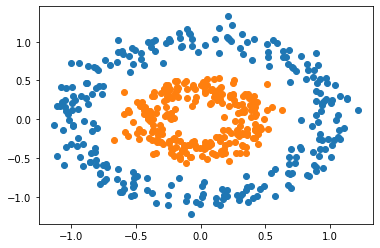

In [53]:
scatter_plot()

In [54]:
class Model(nn.Module):
    def __init__(self,input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [91]:
torch.manual_seed(2)
model = Model(2, 3, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683]], requires_grad=True), Parameter containing:
tensor([-0.0813, -0.5717,  0.1614], requires_grad=True), Parameter containing:
tensor([[-0.5112,  0.0759,  0.0384]], requires_grad=True), Parameter containing:
tensor([-0.1270], requires_grad=True)]


In [92]:
def plot_fit(title):
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    plt.title = title
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, "r")
    scatter_plot()

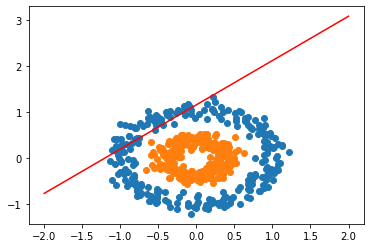

In [93]:
plot_fit("Initial Model")

In [94]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [95]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss 0.7062926292419434
epoch: 1 loss 0.6936768889427185
epoch: 2 loss 0.6955364942550659
epoch: 3 loss 0.6989302039146423
epoch: 4 loss 0.6973802447319031
epoch: 5 loss 0.694240391254425
epoch: 6 loss 0.6925241947174072
epoch: 7 loss 0.6928674578666687
epoch: 8 loss 0.6940062642097473
epoch: 9 loss 0.6944047808647156
epoch: 10 loss 0.6935906410217285
epoch: 11 loss 0.6920896768569946
epoch: 12 loss 0.6906938552856445
epoch: 13 loss 0.6898617744445801
epoch: 14 loss 0.6894757151603699
epoch: 15 loss 0.6890111565589905
epoch: 16 loss 0.6879810690879822
epoch: 17 loss 0.6862649917602539
epoch: 18 loss 0.6840805411338806
epoch: 19 loss 0.6817226409912109
epoch: 20 loss 0.6793121099472046
epoch: 21 loss 0.6767123937606812
epoch: 22 loss 0.6736546754837036
epoch: 23 loss 0.6699527502059937
epoch: 24 loss 0.6656143069267273
epoch: 25 loss 0.6607937216758728
epoch: 26 loss 0.6556622385978699
epoch: 27 loss 0.6502984762191772
epoch: 28 loss 0.6446598768234253
epoch: 29 loss 0.63864374

epoch: 360 loss 0.032140202820301056
epoch: 361 loss 0.032073501497507095
epoch: 362 loss 0.03200696408748627
epoch: 363 loss 0.031940579414367676
epoch: 364 loss 0.03187435120344162
epoch: 365 loss 0.0318082720041275
epoch: 366 loss 0.03174235299229622
epoch: 367 loss 0.031676579266786575
epoch: 368 loss 0.031610965728759766
epoch: 369 loss 0.031545501202344894
epoch: 370 loss 0.03148018568754196
epoch: 371 loss 0.03141501918435097
epoch: 372 loss 0.03135000541806221
epoch: 373 loss 0.0312851257622242
epoch: 374 loss 0.031220385804772377
epoch: 375 loss 0.03115580789744854
epoch: 376 loss 0.03109136037528515
epoch: 377 loss 0.031027061864733696
epoch: 378 loss 0.03096289560198784
epoch: 379 loss 0.03089887648820877
epoch: 380 loss 0.030834995210170746
epoch: 381 loss 0.030771249905228615
epoch: 382 loss 0.030707642436027527
epoch: 383 loss 0.03064417466521263
epoch: 384 loss 0.030580837279558182
epoch: 385 loss 0.030517637729644775
epoch: 386 loss 0.030454574152827263
epoch: 387 loss 

epoch: 721 loss 0.016510969027876854
epoch: 722 loss 0.01648722216486931
epoch: 723 loss 0.016463546082377434
epoch: 724 loss 0.016439927741885185
epoch: 725 loss 0.01641637086868286
epoch: 726 loss 0.016392886638641357
epoch: 727 loss 0.016369473189115524
epoch: 728 loss 0.01634611003100872
epoch: 729 loss 0.016322826966643333
epoch: 730 loss 0.016299594193696976
epoch: 731 loss 0.01627642847597599
epoch: 732 loss 0.01625332608819008
epoch: 733 loss 0.01623028703033924
epoch: 734 loss 0.01620730757713318
epoch: 735 loss 0.01618439331650734
epoch: 736 loss 0.016161544248461723
epoch: 737 loss 0.016138756647706032
epoch: 738 loss 0.016116028651595116
epoch: 739 loss 0.016093358397483826
epoch: 740 loss 0.01607075333595276
epoch: 741 loss 0.016048209741711617
epoch: 742 loss 0.0160257276147604
epoch: 743 loss 0.016003301367163658
epoch: 744 loss 0.01598094217479229
epoch: 745 loss 0.015958642587065697
epoch: 746 loss 0.01593639701604843
epoch: 747 loss 0.01591421477496624
epoch: 748 loss

Text(0.5, 0, 'epoch')

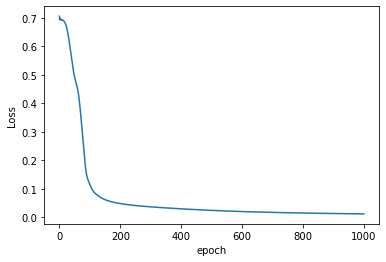

In [96]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

In [101]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]), max(X[:,0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:,1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

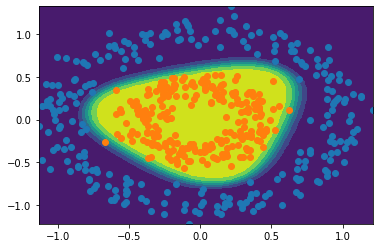

In [102]:
plot_decision_boundary(X, y)
scatter_plot()

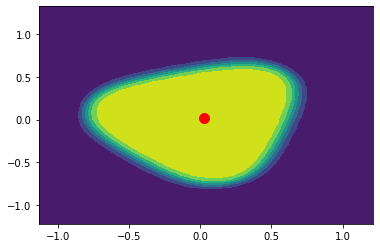

In [106]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
plot_decision_boundary(X, y)